# <font color= darkblue><i>  We will compare automl(MLjar, AutoviML,TPOT) aggregations with normal algorithms(Random Forest, SVC, Logistic Regression, XGBoost) on  financial dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from tqdm.notebook import tqdm, trange
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

#from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import time

import warnings
warnings.filterwarnings("ignore")
# Dataset Link= https://www.kaggle.com/code/aniruddhachoudhury/e-signing-of-loan-based-on-financial-history/data

/kaggle/input/esigning-of-loan-based-on-financial-history/financial_data.csv


In [2]:
df = pd.read_csv("financial_data.csv")

In [4]:
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
df.drop(columns=["entry_id"], axis = 1, inplace=True)

In [5]:
df = df.dropna()

# <font color= darkblue><i> 1.MLJAR(AutoML) ALgorithm

In [6]:
pip install mljar-supervised

     |████████████████████████████████| 94 kB 828 kB/s eta 0:00:011
     |████████████████████████████████| 27.4 MB 16.3 MB/s eta 0:00:01   |▌                               | 389 kB 4.5 MB/s eta 0:00:07
     |████████████████████████████████| 1.7 MB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 439 kB/s  eta 0:00:01
     |████████████████████████████████| 319 kB 45.1 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 50.3 MB/s eta 0:00:01


  Created wheel for mljar-supervised: filename=mljar_supervised-0.10.2-py3-none-any.whl size=132222 sha256=51aa8c5939ba87c396982e93ad5ec55c54d40eac1d3093371a01f1f048c2f843
  Stored in directory: /root/.cache/pip/wheels/aa/68/91/a942a4c112c82accf874941972d041b41d51a55860f2a843f7
  Created wheel for dtreeviz: filename=dtreeviz-1.0-py3-none-any.whl size=47219 sha256=0bb31dc4f698b2e6a41a6bb0e509e5083b8f8e743cf9933dd7a2de8c4853c97b
  Stored in directory: /root/.cache/pip/wheels/0a/27/39/56e6216f118120c9a3d1c7a5f4ce96f06a98ccd20f691166fe
  Created wheel for shap: filename=shap-0.36.0-cp37-cp37m-linux_x86_64.whl size=461192 sha256=338c22104af617ecf06d873c6163a165fea752fd73196ea3d2b6336220902cc1
  Stored in directory: /root/.cache/pip/wheels/6b/1e/4a/b1d65778aac48b677ac2a758251f9cccb338775e8d174f3696
Successfully built mljar-supervised dtreeviz shap
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.

In [7]:
from supervised.automl import AutoML

In [8]:
X = df.drop(columns=["e_signed"], axis = 1)
y = df["e_signed"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
auto = AutoML(mode="Perform")
auto.fit(X_train,y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM logloss 0.618121 trained in 31.09 seconds (1-sample predict time 0.0517 seconds)
2_Default_Xgboost logloss 0.618575 trained in 27.72 seconds (1-sample predict time 0.1778 seconds)
3_Default_CatBoost logloss 0.62141 trained in 33.11 seconds (1-sample predict time 0.0566 seconds)
4_Default_NeuralNetwork logloss 0.662774 trained in 12.81 seconds (1-sample predict time 0.1225 seconds)
5_Default_RandomForest logl

55_RandomForest logloss 0.632673 trained in 57.32 seconds (1-sample predict time 0.5809 seconds)
56_NeuralNetwork_SelectedFeatures logloss 0.656584 trained in 13.32 seconds (1-sample predict time 0.1223 seconds)
57_NeuralNetwork_SelectedFeatures logloss 0.6546 trained in 15.93 seconds (1-sample predict time 0.1476 seconds)
58_NeuralNetwork_SelectedFeatures logloss 0.655657 trained in 12.28 seconds (1-sample predict time 0.1424 seconds)
59_NeuralNetwork_SelectedFeatures logloss 0.655302 trained in 13.8 seconds (1-sample predict time 0.1205 seconds)
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.611418 trained in 6.35 seconds (1-sample predict time 0.448 seconds)
AutoML fit time: 2331.2 seconds
AutoML best model: Ensemble


AutoML(mode='Perform')

In [14]:
y_predictions = auto.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, y_predictions)

0.644891122278057

In [17]:
automl = AutoML(mode = "Perform", 
               top_models_to_improve = 3, 
               boost_on_errors = True, 
               verbose = 1, 
               explain_level = 1,
               algorithms = ["Random Forest","Extra Trees","LightGBM","Xgboost","CatBoost"])

automl.fit(X_train,y_train)

AutoML directory: AutoML_2
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM logloss 0.618121 trained in 37.66 seconds (1-sample predict time 0.0583 seconds)
2_Default_Xgboost logloss 0.618575 trained in 29.73 seconds (1-sample predict time 0.0614 seconds)
3_Default_CatBoost logloss 0.62141 trained in 34.04 seconds (1-sample predict time 0.0579 seconds)
4_Default_RandomForest logloss 0.647775 trained in 32.27 seconds (1-sample predict time 0.5842 seconds)
5_Default_ExtraTrees logloss 0.663994 train

56_Xgboost_GoldenFeatures_SelectedFeatures logloss 0.617947 trained in 33.28 seconds (1-sample predict time 0.1179 seconds)
57_CatBoost logloss 0.619092 trained in 53.62 seconds (1-sample predict time 0.0587 seconds)
58_CatBoost logloss 0.620371 trained in 58.74 seconds (1-sample predict time 0.0573 seconds)
59_CatBoost_SelectedFeatures logloss 0.61966 trained in 54.72 seconds (1-sample predict time 0.0553 seconds)
60_RandomForest_SelectedFeatures logloss 0.637237 trained in 30.8 seconds (1-sample predict time 0.5842 seconds)
61_RandomForest logloss 0.63629 trained in 36.37 seconds (1-sample predict time 0.5791 seconds)
62_RandomForest_SelectedFeatures logloss 0.637131 trained in 36.12 seconds (1-sample predict time 0.5771 seconds)
63_ExtraTrees logloss 0.655865 trained in 27.78 seconds (1-sample predict time 0.5837 seconds)
64_ExtraTrees logloss 0.656132 trained in 28.95 seconds (1-sample predict time 0.5807 seconds)
65_ExtraTrees_SelectedFeatures logloss 0.655452 trained in 25.32 sec

AutoML(algorithms=['Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost',
                   'CatBoost'],
       boost_on_errors=True, explain_level=1, mode='Perform',
       top_models_to_improve=3)

In [ ]:
y_predict = automl.predict(X_test)

In [21]:
accuracy_score(y_test, y_predict)

0.6476828587381351

# <font color= darkblue><i> 2.  AutoViML(AutoML) Algorithm

In [22]:
pip install git+https://github.com/AutoViML/Auto_ViML.git

  Cloning https://github.com/AutoViML/Auto_ViML.git to /tmp/pip-req-build-7wmfqixu
  Running command git clone -q https://github.com/AutoViML/Auto_ViML.git /tmp/pip-req-build-7wmfqixu
     |████████████████████████████████| 125 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 2.5 MB/s eta 0:00:011


  Created wheel for autoviml: filename=autoviml-0.1.680-py3-none-any.whl size=125428 sha256=6ae6879b6dff847cdf245f1de032e797ee35d48f89d95a376f1c7c8c8580a4ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-cjui1122/wheels/0d/14/68/1dca83f0c2e52ab7e9ecc443a417360e9ecd89117f6f264b7d
Successfully built autoviml
Note: you may need to restart the kernel to use updated packages.


In [25]:
train = pd.concat([X_train, y_train], axis = 1)

In [ ]:
train.isna().sum()

In [24]:
test = pd.concat([X_test, y_test], axis = 1)

In [26]:
test = test.dropna()

In [ ]:
test.isna().sum()

In [27]:
sample_submission=''
scoring_parameter = 'balanced-accuracy'
target = "e_signed"

In [28]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.680. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
Now Auto_ViML can solve multi-label, multi-output problems. Also Auto_NLP included.
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (12535, 20)
    Training Set Memory Usage = 1.91 MB
Test Set Shape = (1609, 20)
    Test Set Memory Usage = 0.26 MB
Single_Label Target: ['e_signed']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:    5799  ->   46.3%
           1:    6736  ->   53.7%
    Target e_signed is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    19 Predictors classified...
        This does not include the Target column(s)
    No variabl

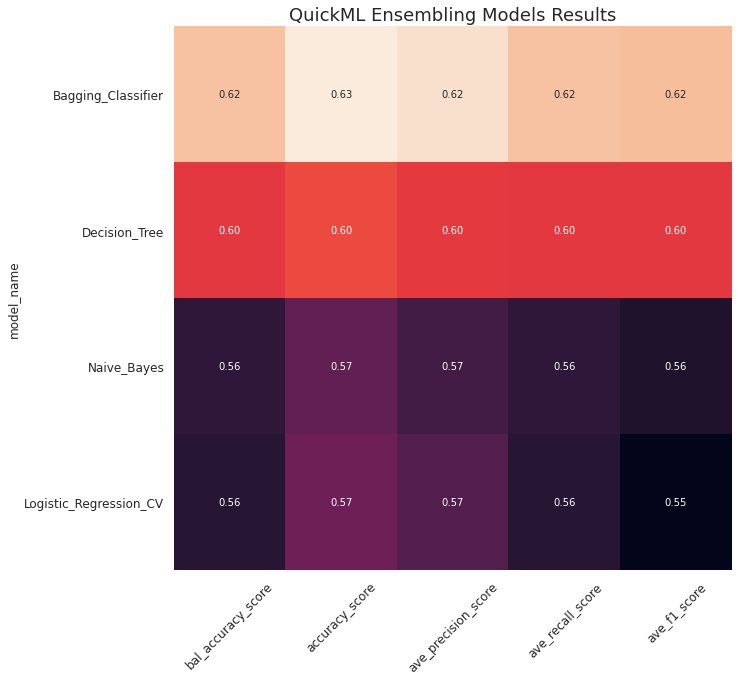

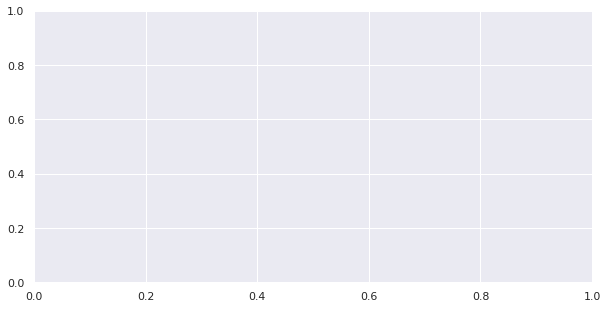

In [29]:
model, features, train_modified, test_modified = Auto_ViML(train, 
                                                           target, 
                                                           test, 
                                                           sample_submission,
                                                           scoring_parameter=scoring_parameter,
                                                           hyper_param='RS',
                                                           feature_reduction=True,
                                                           Boosting_Flag=True,
                                                           Binning_Flag=False,
                                                           Add_Poly=0, 
                                                           Stacking_Flag=False,
                                                           Imbalanced_Flag=False,
                                                           verbose=0)

In [68]:
X_train = pd.get_dummies(X_train, "pay_schedule")

In [71]:
X_test = pd.get_dummies(X_test, "pay_schedule")

In [72]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=8, gpu_id=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.031446387626298145,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=-999, monotone_constraints='()', n_estimators=229,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              predictor='cpu_predictor', random_state=1, reg_alpha=0.5,
              reg_lambda=0.5, scale_pos_weight=1, seed=1, subsample=0.7,
              tree_method='hist', updater='grow_colmaker', ...)

In [74]:
y_pred = model.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.6443327749860414

# <font color= darkblue><i> 3. Tpot(AutoML) Algorithm

In [80]:
!pip install deap update_checker tqdm stopit xgboost
!pip install scikit-mdr skrebate
!pip install tpot

  Created wheel for scikit-mdr: filename=scikit_MDR-0.4.4-py3-none-any.whl size=14636 sha256=a201019245c9b7551784c8f507decf366c7e29ba79afb3992dccfba98b17ed92
  Stored in directory: /root/.cache/pip/wheels/32/d0/b5/3ac42d99dd9d9d02b8587d5ebb72b7b137ce0908ccfa5b8fa9
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29256 sha256=5c0145b1dcfc082640785b48ba9e0914863f5a3662bcae7e411a85ffb557e9ae
  Stored in directory: /root/.cache/pip/wheels/4f/3b/07/22a9a01f3f25cd376122b5ef526737a44993b4c312e50916ed
Successfully built scikit-mdr skrebate


In [81]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

In [82]:
tpot = TPOTRegressor(verbosity=2, max_time_mins=10, population_size=40, n_jobs=-1, random_state=42)

In [83]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


10.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8, min_samples_leaf=10, min_samples_split=6, n_estimators=100)


TPOTRegressor(max_time_mins=10, n_jobs=-1, population_size=40, random_state=42,
              verbosity=2)

In [99]:
y_tpot_predict = tpot.predict(X_test)

In [100]:
y_tpot_pred = []
for predict in y_tpot_predict:
    y_tpot_pred.append(round(predict))

In [102]:
accuracy_score(y_test, y_tpot_pred)

0.6259073143495254

## <font color= darkblue><i> SVC Algorithm

In [103]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [104]:
y_svs_pred = svc_model.predict(X_test)

In [105]:
accuracy_score(y_test, y_svs_pred)

0.5535082821514983

## <font color= darkblue><i> XGBoost Algorithm

In [109]:
import xgboost as xgb

In [110]:
model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
y_xgb_pred = model.predict(X_test)
accuracy_score(y_test, y_xgb_pred)

0.6463800483900987

## <font color= darkblue><i> Logistic Regression Algorithm

In [112]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_log_pred = model.predict(X_test)
accuracy_score(y_test, y_log_pred)

0.6463800483900987

## <font color= darkblue><i> Random Forest Algorithm

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
accuracy_score(y_test, y_rf_pred)

0.6238600409454681

# <font color= darkblue><i>  Comparing the accuracies:

In [28]:
import pandas as pd 
result=pd.DataFrame(index=["MLJar (Best model:Ensemble)","AutoViMl (BestMmodel:Bagging_Classifier)","TPOT(BestMmodel: RandomForestRegressor)",
                           "SVC","XGBoost","Logistic","Random Forest"],
                columns=["Accuracy Score(%)"])

In [29]:

result["Accuracy Score(%)"]=[64.76,64.43,62.59,55.35,64.63,64.63,62.38]
result

,Accuracy Score(%)
MLJar (Best model:Ensemble),64.76
AutoViMl (BestMmodel:Bagging_Classifier),64.43
TPOT(BestMmodel: RandomForestRegressor),62.59
SVC,55.35
XGBoost,64.63
Logistic,64.63
Random Forest,62.38


### <font color= darkblue><i> MLJar AutoML Library(Best model:Ensemble)  gives highest performance 64.76%